<html>
<div style="text-align: center">  
  <img src="" width=260px style="padding:10px; text-align: left;"/> </div>


    
    

<div style="background-image: linear-gradient(to left, rgb(255, 255, 255), rgb( 170, 141, 220 )); width: auto; text-align: center; height: 40px; margin: 10px;">
<h1 style="font-family: Georgia; color: black;">AI - Project1 : Genetic Algorithms : Knapsack Problem</h1>
</div>
<div style=" background-image: linear-gradient(to left, rgb(255, 255, 255), rgb( 219, 204, 245  )); width: 400px; height: 30px; margin: 10px; text-alighn:middle">
  <span style="font-family: Georgia; font-size:15pt; color: ; vertical-align: left;">FatemeZahra Broumandnia </span>
    
</div>
    
<div style=" background-image: linear-gradient(to left, rgb(255, 255, 255), rgb( 219, 204, 245  )); width: 400px; height: 30px; margin:10px 10px; text-alighn:middle">
  <span style="font-family: Georgia; font-size:12pt; color: ; vertical-align: left;">Student Id: 810100094</span>
    
</div>
</html>


<html>
    
<div >
<p5>   


# Goal:
The goal of this project is to solve the knapsack problem using a genetic algorithm approach. The knapsack problem is a classic optimization problem where the goal is to maximize the total value of items selected, subject to a constraint on the total weight and total value of the selected items. In this context, the project aims to find the optimal selection of items to maximize the value while ensuring that the total weight does not exceed the carrier limit and the total value is greater than or equal to the minimum value.

# Problem Description:
The problem involves selecting a subset of items from a given set of items, each with its own weight and value. The objective is to maximize the total value of the selected items while ensuring that the total weight does not exceed a given carrier limit and that the total value is greater than or equal to a specified minimum value. This problem is known as the knapsack problem and is considered a combinatorial optimization problem.
    
</p5>
 </div>       
    <html>


In [ ]:
import pandas as pd
import random
from operator import itemgetter
import random
import copy
import io
import matplotlib.pyplot as plt

In [ ]:
class Item:
    def __init__(self, id, weight, value):
        self.id = id
        self.weight = weight
        self.value = value

In [2]:
!pip install google.colab

ERROR: Could not install packages due to an OSError: HTTPSConnectionPool(host='files.pythonhosted.org', port=443): Max retries exceeded with url: /packages/70/9f/d3ec1275a089ec017f9c91af22ecd1e2fe738254b944e7a1f9528fcfacd0/google-colab-1.0.0.tar.gz (Caused by ReadTimeoutError("HTTPSConnectionPool(host='files.pythonhosted.org', port=443): Read timed out. (read timeout=15)"))




# Importing data
Data is imported from csv and saved in the proper data structure to get used in later.

In [1]:
from google.colab import files

uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
for filename, data in uploaded.items():
    if filename.endswith('.csv'):
        df = pd.read_csv(io.BytesIO(data))

print(df)

            Snack  Available Weight  Value
0          MazMaz                10     10
1   Doogh-e-Abali                15     10
2            Nani                 5      5
3            Jooj                 7     15
4         Hot-Dog                20     15
5           Chips                 8      6
6        Nooshaba                12      8
7        Shokolat                 6      7
8       Chocoroll                 9     12
9         Cookies                11     11
10        Abnabat                 4      4
11   Adams-Khersi                14      9
12        Popcorn                16     13
13         Pastil                 3      7
14       Tordilla                10      9
15       Masghati                 5      6
16        Ghottab                 7     10
17   Saghe-Talaei                 9     11
18    Choob-Shoor                13     12


In [ ]:
item_list = []
for index, row in df.iterrows():
    item = Item(row['Snack'], float(row['Available Weight']), float(row['Value']))
    item_list.append(item)

# Now 'items' list contains Item objects
for item in item_list:
    print(f"ID: {item.id}, Weight: {item.weight}, Value: {item.value}")

ID: MazMaz, Weight: 10, Value: 10
ID: Doogh-e-Abali, Weight: 15, Value: 10
ID: Nani, Weight: 5, Value: 5
ID: Jooj, Weight: 7, Value: 15
ID: Hot-Dog, Weight: 20, Value: 15
ID: Chips, Weight: 8, Value: 6
ID: Nooshaba, Weight: 12, Value: 8
ID: Shokolat, Weight: 6, Value: 7
ID: Chocoroll, Weight: 9, Value: 12
ID: Cookies, Weight: 11, Value: 11
ID: Abnabat, Weight: 4, Value: 4
ID: Adams-Khersi, Weight: 14, Value: 9
ID: Popcorn, Weight: 16, Value: 13
ID: Pastil, Weight: 3, Value: 7
ID: Tordilla, Weight: 10, Value: 9
ID: Masghati, Weight: 5, Value: 6
ID: Ghottab, Weight: 7, Value: 10
ID: Saghe-Talaei, Weight: 9, Value: 11
ID: Choob-Shoor, Weight: 13, Value: 12


# Part1: Define basic concepts
In this project
- chromosome: In the context of this problem, a chromosome represents a potential solution to the knapsack problem. It is a binary string where each bit corresponds to whether or not the corresponding item is included in the knapsack. For example, if there are 5 items, a chromosome of length 5 might look like 10110, where each digit represents whether the corresponding item is included (1) or not (0).
- gene: A gene refers to each individual bit in the chromosome. In the example above, each digit (1 or 0) is a gene. Each gene determines whether the corresponding item is selected or not. For instance, in the chromosome 10110, the first gene represents whether the first item is selected (1) or not (0), the second gene represents the second item, and so on



In [ ]:
carrier_limit = 25.0
min_value = 28
population_size = 5
generation_size = 100
mutation_rate = 0.1


# Part2: Production of the primary population
in the "initial_population" function I tried to generate the primary population.Due to that, I used "random" library to generate a row of random coefficients. and I repeated it to expand my population and have more rows. It ensures that the generated solutions meet the validity criteria and do not contain duplicates within the population.


# Part3: Fitness Function
GAs require a fitness function which allocates a score to each chromosome in the current
population. Thus, it can calculate how well the solutions are coded and how well they
solve the problem.

For our knapsack problem, we can define the fitness coefficient of an individual (solution) as the summation of the values of the items picked in the knapsack as per the bit string if the total weight of the picked items is less than the weight knapsack can hold. The fitness coefficient of an individual is 0 if the total weight of the item picked is greater than the weight that the knapsack can hold.

In [ ]:
def initial_population(pop_size, i_list, w_limit, v_limit):
    population = []
    i = 0
    while i < pop_size:
        new_solution = create_random_solution(i_list)
        if valid_solution(i_list, new_solution, w_limit, v_limit):
            if len(population) == 0:
                population.append(new_solution)
                i += 1
            else:
                skip = False
                for j in range(0, len(population)):
                    if check_duplicate_solutions(new_solution, population[j]):
                        skip = True
                        continue
                if not skip:
                    population.append(new_solution)
                    i += 1
    return population

# Auxiliary Functions
to calculate weight, value, print answer, checking duplications and ...

In [ ]:
def tournament_selection(pop):
    ticket_1 = random.randint(0, len(pop) - 1)
    ticket_2 = random.randint(0, len(pop) - 1)
    if calculate_value(item_list, pop[ticket_1]) > calculate_value(item_list, pop[ticket_2]):
        winner = pop[ticket_1]
    else:
        winner = pop[ticket_2]

    return winner

def create_generation(pop, mut_rate):
    new_gen = []
    for i in range(0, len(pop)):
        parent_1 = tournament_selection(pop)
        parent_2 = tournament_selection(pop)
        child = crossover(parent_1, parent_2)

        if random.random() < mut_rate:
            child = mutation(child)

        new_gen.append(child)
    return new_gen

def best_solution(generation, i_list):
    best = 0
    best_ans = []
    for i in range(0, len(generation)):
        temp = calculate_value(i_list, generation[i])
        if temp > best:
            best = temp
            best_ans = generation[i]
    return best, best_ans


value_list = []

def create_random_solution(i_list):
    solution = []
    for i in range(0, len(i_list)):
        solution.append(random.randint(0, 1))
    return solution

def valid_solution(i_list, s_list, w_limit, v_limit):
    total_weight = 0
    total_value=0
    for i in range(0, len(s_list)):
        if s_list[i] == 1:
            total_weight += i_list[i].weight
            total_value += i_list[i].value
        if total_weight > w_limit:
            return False
    if total_value < v_limit:
        return False
    return True

def calculate_weight(i_list, s_list):
    total_value = 0
    for i in range(0, len(s_list)):
        if s_list[i] == 1:
            total_value += i_list[i].weight
    return total_value

def calculate_value(i_list, s_list):
    total_value = 0
    for i in range(0, len(s_list)):
        if s_list[i] == 1:
            total_value += i_list[i].value
    return total_value

def check_duplicate_solutions(s_1, s_2):
    for i in range(0, len(s_1)):
        if s_1[i] != s_2[i]:
            return False
    return True
def print_ans(i_list, s_list):
  ans_list = []
  for i in range(0, len(s_list)):
      if s_list[i] == 1:
          ans_list.append(i_list[i].id)
  print(ans_list)


# Part4:  Mutation & Cross Over

* Crossover:crossover is a genetic operator used to combine the genetic information of two parents to generate new offspring. It is one way to stochastically generate new solutions from an existing population.

* Mutation: A mutation is a random change to a solution in a population of solutions. Mutations can be beneficial, harmful, or neutral to the solution's fitness. In artificial intelligence, mutations are often used to generate new solutions in the hope of finding a better solution.

In my crossover method, it takes two parent chromosomes (p_1 and p_2) as input and performs crossover to generate a child chromosome.
A random break_point is chosen between 0 and the length of the parent chromosome p_1.
The first part of the child chromosome (first_part) is taken from the beginning of p_1 up to the break_point.
The second part of the child chromosome (second_part) is taken from the break_point to the end of p_2.
The child chromosome is formed by concatenating the first and second parts.
The function then checks if the child chromosome is valid (i.e., satisfies the constraints of the problem, such as weight and value limits) using the valid_solution function.
If the child chromosome is valid, it is returned. Otherwise, the crossover operation is recursively called with the same parent chromosomes until a valid child chromosome is generated.



In [ ]:
def crossover(p_1, p_2):
    break_point = random.randint(0, len(p_1))
    first_part = p_1[:break_point]
    second_part = p_2[break_point:]
    child = first_part + second_part
    if valid_solution(item_list, child, carrier_limit, min_value):
        return child
    else:
        return crossover(p_1, p_2)

My mutation function takes a chromosome (chromosome) as input and performs mutation to generate a mutated chromosome.
Two distinct random indices (mutation_index_1 and mutation_index_2) are chosen between 0 and the length of the chromosome.
The values at these indices in the chromosome are swapped to introduce variation.
The function then checks if the mutated chromosome is valid using the valid_solution function.
If the mutated chromosome is valid, it is returned. Otherwise, the mutation operation is recursively called with the same chromosome until a valid mutated chromosome is generated.

In [ ]:
def mutation(chromosome):
    temp = chromosome
    mutation_index_1, mutation_index_2 = random.sample(range(0, len(chromosome)), 2)
    temp[mutation_index_1], temp[mutation_index_2] = temp[mutation_index_2], temp[mutation_index_1]
    if valid_solution(item_list, temp, carrier_limit, min_value):
        return temp
    else:
        return mutation(chromosome)

# Part5: Do the genetic algorithm on the problem

at the end, we consider all the previous steps and create a genetic_algorithm function to implement the genetic algorithm. this function iterates all the above steps in the number of epochs.

Function Steps:

value_list=[]: Initializes an empty list value_list to store the best value found in each generation.

it Initializes the population by calling the initial_population function, which generates an initial population of solutions (chromosomes). then Iterates over each generation for a specified number of generations.

it Creates a new generation of solutions by calling the create_generation function. This function generates a new population of solutions by performing selection, crossover, and mutation operations on the current population.

best_val, best_ans=best_solution(pop, i_list): Finds the best solution in the current generation by calling the best_solution function, which returns the solution with the highest value.


In [ ]:
def genetic_algorithm(c_limit, v_limit, p_size, gen_size, mutation_rate, i_list):
    value_list=[]
    pop = initial_population(p_size, i_list, c_limit, v_limit)
    for i in range(0, gen_size):
        pop = create_generation(pop, mutation_rate)
        #print(pop[0])

        #print("value --> ", calculate_value(i_list, pop[0]))

        best_val, best_ans=best_solution(pop, i_list)
        #print("best val --> ", best_val)
        #print_ans(i_list, best_ans)
        value_list.append(best_val)
        #print("value list --> ", value_list)
    return pop, value_list, best_ans


# latest population after genetic algorithm run
latest_pop, v_list, best_ans = genetic_algorithm(c_limit=carrier_limit,
                                       v_limit=min_value,
                                       p_size=population_size,
                                       gen_size=generation_size,
                                       mutation_rate=mutation_rate,
                                       i_list=item_list)

print_ans(item_list, best_ans)
print("value --> ", v_list[-1])

['Jooj', 'Chocoroll', 'Pastil', 'Masghati']
value -->  40


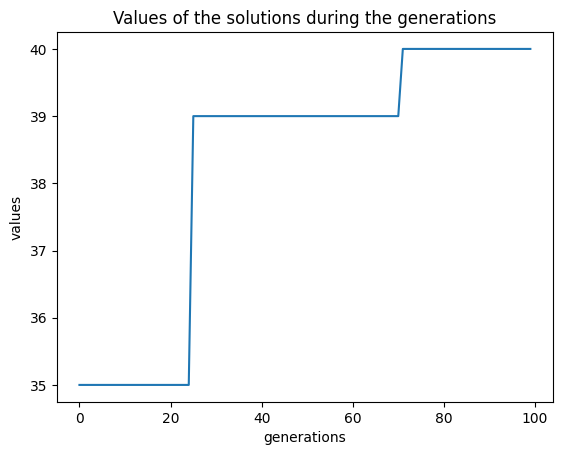

In [ ]:
# Plot a graph to show the progress
plt.plot(v_list)
plt.xlabel('generations')
plt.ylabel('values')
plt.title("Values of the solutions during the generations")
plt.show()

<html>
    
<div>
<p5>   


# Questions:



## 1. How can very large or very small population sizes affect the performance of the algorithm?
#### very large population:
- the algorithm may take a long time to find the best solution because of each iteration time
- it may be unnecessary to spend that much time.
- it also may have complex operations
- each iteration would be longer

#### very large population:
- the diversity of the chromosomes is limited
- we need more iteration to find a solution
- total rum time would increase because of the more iteration
- the algorithm may not be able to find the best solution because it may not have enough chromosomes to select from.

<html><hr/></html>

## 2. What happens if the population size increases in each generation?

#### benefits:
 - The more the population size gets, the more accurate the result will be.

#### disadvantages:
- it increases the time complexity and the memory usage.
- due to computation increment,speed would decrease

<html><hr/></html>

## 3. What is the effect of crossover and mutation? Is it possible to use only one of them?

- crossover: Crossover is used to create new chromosomes from the existing chromosomes. The problem of this operation is that; if we do not consider the chromosomes with special properties, we are not able to generate them and have such properties in our final result. so we should use mutation,too.
- Mutation: Mutation is used to change the genes of the chromosomes. The problem of this method is that it does not have any relations with our primary population. for example, in this problem if we just do mutation, we can be far away from the efficient result.The reason is that we are changing the coefficients randomly and this is just random! we need to do crossover to use the primary population and lead to better results.

so we should do both of them together.

<html><hr/></html>

## 4. How to accelerate the algorithm?
we should make the algorithm better by implementing crossover and mutation functions more efficiently.Fitness function, parameters such as the probability of crossover and mutation, and the population size should be chosen carefully. Also, the crossover and mutation functions can affect the performance of the algorithm.

<html><hr/></html>

## 5. How to stop the algorithm if it is not converging?

If we just use crossover operation, this happens. It indicates that it may have stopped at a local maximum instead of the global maximum. In order to avoid that, Mutation is a good choice. In mutation chromosomes are changed randomly and we can generate new properties. Also, we can limit the number of generations in order to stop the algorithm if it is not converging. In the other hand, multi-start is another way to increase the probability of finding the global maximum.

<html><hr/></html>

## 6. How to stop the algorithm if there exists no solution?

we can put some limitations.
* time limitation is a good one
* also we can limit the iterations and set a specific amount of iterations.
* Threshold fitness solution is another way.The algorithm will terminate after the threshold fitness solution has been attained.

</p5>
 </div>       
    <html>


<html>
    
<div>
<p5>   

# Resources :

- https://pubs.rsc.org/en/content/articlelanding/2008/cp/b807326k
- https://www.youtube.com/watch?v=Q530u_g2CWE&list=PLYwpaL_SFmcDHUTN26NXKfjg6wFJKDO9R
- https://www.tutorialspoint.com/genetic_algorithms/genetic_algorithms_termination_condition.html
- https://www.youtube.com/watch?v=frB2zIpOOBk
- https://www.geeksforgeeks.org/mutation-algorithms-for-string-manipulation-ga/
    
</p5>
 </div>       
    <html>
